In [86]:
# Import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set(style="darkgrid")

In [2]:
# Load the data
df_raw = pd.read_csv('./restaurant-survey-dataset.csv')

df_raw.head()

,Bill Amount,Who Tipped,Tip Amount,Ethnicity,Day Dined,Meal Period,How Dined,Overall Satisfaction,Will Return,Would Recommend,Greeted Friendly,Meal Quality,Overall Service,"Music, Lighting, Temp.",Cleanliness,Food Delivery Speed,Bev. Service Speed,Offered Appetizer
0,$16.80,Me,$5.00,White,Sat,Lunch,Dine In,Excellent,Definitely Will,Definitely Would,Yes,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Don't Remember
1,$28.40,Me,$6.00,White,Mon,Dinner,Dine In,Excellent,Definitely Will,Definitely Would,Yes,Excellent,Very Good,Very Good,Excellent,Very Good,Excellent,Don't Remember
2,$21.00,Me,$3.40,Asian,Wed,Lunch,Dine In,Very Good,Definitely Will,Definitely Would,Yes,Excellent,Very Good,Excellent,Excellent,Very Good,Very Good,No
3,$52.61,Me,$7.39,Other,Sun,Dinner,Dine In,Very Good,Might or Might Not,Might or Might Not,Yes,Good,Excellent,Very Good,Very Good,Very Good,Very Good,No
4,$20.16,Me,$4.00,White,Thu,Lunch,Dine In,Excellent,Definitely Will,Definitely Would,Yes,Excellent,Very Good,Excellent,Excellent,Excellent,Excellent,Yes


### Identify Performance Metrics

* Tip Percentage
* Overall Satisfaction
* Will Return
* Would Recommend

### Identify Key Environmental Drivers
* Day Dined
* Meal Period
* Ethnicity
* How Dined

### Identify Factors for Conjoint Analysis
* Greeted Friendly
* Meal Quality
* Overall Service
* Music, Lighting, Temperature
* Cleanliness
* Food Delivery Speed
* Beverage Service Speed
* Offered Appetizer

In [3]:
# Print Information about the data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Bill Amount             1345 non-null   object
 1   Who Tipped              1345 non-null   object
 2   Tip Amount              1338 non-null   object
 3   Ethnicity               1345 non-null   object
 4   Day Dined               1345 non-null   object
 5   Meal Period             1345 non-null   object
 6   How Dined               1345 non-null   object
 7   Overall Satisfaction    1345 non-null   object
 8   Will Return             1345 non-null   object
 9   Would Recommend         1345 non-null   object
 10  Greeted Friendly        1345 non-null   object
 11  Meal Quality            1345 non-null   object
 12  Overall Service         1345 non-null   object
 13  Music, Lighting, Temp.  1345 non-null   object
 14  Cleanliness             1345 non-null   object
 15  Food

In [4]:
# Print number of null values in each column
df_raw.isnull().sum()

Bill Amount               0
Who Tipped                0
Tip Amount                7
Ethnicity                 0
Day Dined                 0
Meal Period               0
How Dined                 0
Overall Satisfaction      0
Will Return               0
Would Recommend           0
Greeted Friendly          0
Meal Quality              0
Overall Service           0
Music, Lighting, Temp.    0
Cleanliness               0
Food Delivery Speed       0
Bev. Service Speed        0
Offered Appetizer         0
dtype: int64

In [6]:
# Set all null values in the "Tip Amount " column to 0
df_raw['Tip Amount'] = df_raw['Tip Amount'].fillna(0)

df_raw.isnull().sum()

Bill Amount               0
Who Tipped                0
Tip Amount                0
Ethnicity                 0
Day Dined                 0
Meal Period               0
How Dined                 0
Overall Satisfaction      0
Will Return               0
Would Recommend           0
Greeted Friendly          0
Meal Quality              0
Overall Service           0
Music, Lighting, Temp.    0
Cleanliness               0
Food Delivery Speed       0
Bev. Service Speed        0
Offered Appetizer         0
dtype: int64

In [22]:
# Print the unique values in all columns except "Bill Amount" and "Tip Amount" as a dataframe
unique_values = pd.DataFrame()

for column in df_raw.columns:
    if column not in ['Bill Amount', 'Tip Amount']:
        # Set first column as the column name and second column as the unique values in the column
        unique_values[column] = [", ".join(list(df_raw[column].unique()))]


In [74]:
# Print the transposed dataframe without truncation
pd.set_option('display.max_columns', None)

unique_values["Overall Service"]

0    Excellent, Very Good, Good, Fair, Poor - Poor
Name: Overall Service, dtype: object

In [75]:
# Enumerate the unique levels of the categorical variables
satisfaction_scale = {
    'Poor': 1,
    'Poor - Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very Good': 4,
    'Excellent': 5
}

conviction_scale_will = {
    'Definitely Not': 1,
    'Probably Not': 2,
    'Might or Might Not': 3,
    'Probably Will': 4,
    'Definitely Will': 5
}

conviction_scale_would = {
    'Definitely Would Not': 1,
    'Probably Would Not': 2,
    'Might or Might Not': 3,
    'Probably Would': 4,
    'Definitely Would': 5
}

yes_no_scale = {'Yes': 1, 'No': 0, "Don't Remember": 0.5}



In [76]:
# Replace the numerical values with the corresponding categorical values
df = df_raw.copy()

df['Overall Satisfaction'] = df['Overall Satisfaction'].map(satisfaction_scale)
df['Meal Quality'] = df['Meal Quality'].map(satisfaction_scale)
df['Overall Service'] = df['Overall Service'].map(satisfaction_scale)
df['Music, Lighting, Temp.'] = df['Music, Lighting, Temp.'].map(satisfaction_scale)
df['Cleanliness'] = df['Cleanliness'].map(satisfaction_scale)
df['Food Delivery Speed'] = df['Food Delivery Speed'].map(satisfaction_scale)
df['Bev. Service Speed'] = df['Bev. Service Speed'].map(satisfaction_scale)

df['Will Return'] = df['Will Return'].map(conviction_scale_will)

df['Would Recommend'] = df['Would Recommend'].map(conviction_scale_would)

# Replace "Yes" and "No" with 1 and 0 respectively in the "Greeted Friendly" column
df['Greeted Friendly'] = df['Greeted Friendly'].replace(yes_no_scale)
df['Offered Appetizer'] = df['Offered Appetizer'].replace(yes_no_scale)

# Convert the "Bill Amount" and "Tip Amount" columns to float
df['Bill Amount'] = df['Bill Amount'].str.replace('$', '').str.replace(',', '').astype(float)
df['Tip Amount'] = df['Tip Amount'].str.replace('$', '').str.replace(',', '').astype(float)

df.head()

,Bill Amount,Who Tipped,Tip Amount,Ethnicity,Day Dined,Meal Period,How Dined,Overall Satisfaction,Will Return,Would Recommend,Greeted Friendly,Meal Quality,Overall Service,"Music, Lighting, Temp.",Cleanliness,Food Delivery Speed,Bev. Service Speed,Offered Appetizer
0,16.80,Me,5.00,White,Sat,Lunch,Dine In,5,5,5,1,5,5,5,5,5,5,0.5
1,28.40,Me,6.00,White,Mon,Dinner,Dine In,5,5,5,1,5,4,4,5,4,5,0.5
2,21.00,Me,3.40,Asian,Wed,Lunch,Dine In,4,5,5,1,5,4,5,5,4,4,0.0
3,52.61,Me,7.39,Other,Sun,Dinner,Dine In,4,3,3,1,3,5,4,4,4,4,0.0
4,20.16,Me,4.00,White,Thu,Lunch,Dine In,5,5,5,1,5,4,5,5,5,5,1.0


In [77]:
# Print number of null values in each column
df.isnull().sum()

Bill Amount               0
Who Tipped                0
Tip Amount                7
Ethnicity                 0
Day Dined                 0
Meal Period               0
How Dined                 0
Overall Satisfaction      0
Will Return               0
Would Recommend           0
Greeted Friendly          0
Meal Quality              0
Overall Service           0
Music, Lighting, Temp.    0
Cleanliness               0
Food Delivery Speed       0
Bev. Service Speed        0
Offered Appetizer         0
dtype: int64

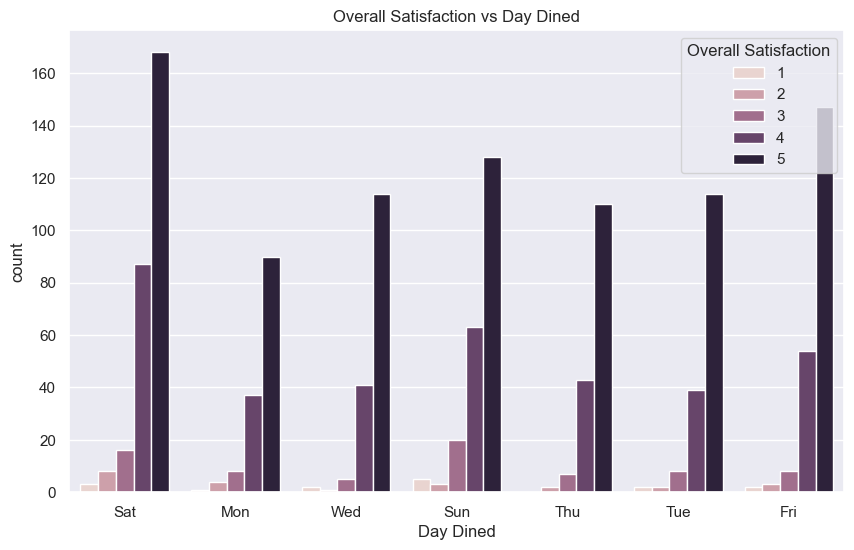

In [78]:
# Plot "Overall Satisfaction" vs "Day Dined" as a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Day Dined', hue='Overall Satisfaction')
plt.title('Overall Satisfaction vs Day Dined')
plt.show()

In [79]:
# Create a new column "Tip Percentage" which is the percentage of the tip amount with respect to the bill amount
df['Tip Percentage'] = (df['Tip Amount'] / df['Bill Amount']) * 100

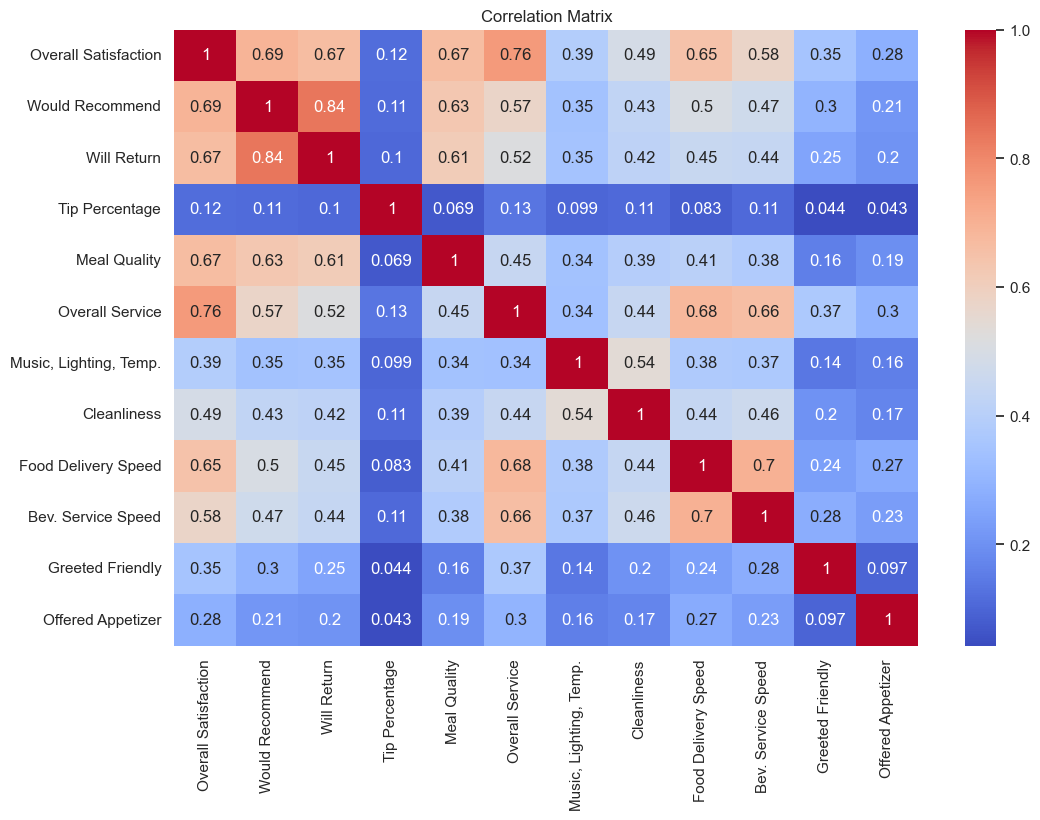

In [80]:
# Create a correlation matrix of the following columns: "Overall Satisfaction", "Meal Quality", "Overall Service", "Tip Percentage", "Music, Lighting, Temp.", "Cleanliness", "Food Delivery Speed", "Bev. Service Speed", "Will Return", "Would Recommend"

correlation_matrix = df[
    ['Overall Satisfaction', 'Would Recommend','Will Return', 'Tip Percentage', 'Meal Quality', 'Overall Service', 'Music, Lighting, Temp.', 'Cleanliness', 'Food Delivery Speed', 'Bev. Service Speed', 'Greeted Friendly', 'Offered Appetizer']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

* Tip doesn't correlate with anything
* Customers tend to value Meal Quality the most
* The overall service is the second most important factor
* The third most important factor is the food and beverage delivery speed
* The customer's perception of the overall service depends on the speed of the food and beverage delivery
* The ambience - music, lighting, and temperature and cleanliness are the least important factors

In [88]:
# Step 3: Define performance/choice indicators and factors
indicator = ['Overall Satisfaction']
factors = ['Meal Quality', 'Overall Service', 'Music, Lighting, Temp.', 'Cleanliness', 'Food Delivery Speed', 'Bev. Service Speed', 'Greeted Friendly', 'Offered Appetizer']

# Step 4: Perform the conjoint analysis
X = df[factors]
Y = df[indicator]

X = sm.add_constant(X)  # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Step 5: Display the importance of each factor
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Overall Satisfaction   R-squared:                       0.734
Model:                              OLS   Adj. R-squared:                  0.733
Method:                   Least Squares   F-statistic:                     461.6
Date:                  Sat, 27 Apr 2024   Prob (F-statistic):               0.00
Time:                          20:45:19   Log-Likelihood:                -665.38
No. Observations:                  1345   AIC:                             1349.
Df Residuals:                      1336   BIC:                             1396.
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.8017      0.108     -7.430      0.000      -1.013      -0.590
Meal Quality               0.3941      0.018     22.449      0.000       0.360       0.429
Overall Service            0.4448      0.023     19.332      0.000       0.400       0.490
Music, Lighting, Temp.     0.0100      0.019      0.530      0.596      -0.027       0.047
Cleanliness                0.0897      0.024      3.723      0.000       0.042       0.137
Food Delivery Speed        0.1597      0.022      7.315      0.000       0.117       0.203
Bev. Service Speed        -0.0245      0.024     -1.021      0.308      -0.072       0.023
Greeted Friendly           0.3819      0.067      5.670      0.000       0.250       0.514
Offered Appetizer          0.0442      0.025      1.745      0.081      -0.005       0.094
==============================================================================
Omnibus:                      460.256   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3769.724
Skew:                          -1.356   Prob(JB):                         0.00
Kurtosis:                      10.740   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# Step 3: Define performance/choice indicators and factors
indicator = ['Would Recommend']

# Step 4: Perform the conjoint analysis
X = df[factors]
Y = df[indicator]

X = sm.add_constant(X)  # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Step 5: Display the importance of each factor
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Would Recommend   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     186.4
Date:                Sat, 27 Apr 2024   Prob (F-statistic):          2.61e-211
Time:                        20:45:55   Log-Likelihood:                -957.77
No. Observations:                1345   AIC:                             1934.
Df Residuals:                    1336   BIC:                             1980.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2350      0.134      1.752      0.080      -0.028       0.498
Meal Quality               0.4266      0.022     19.553      0.000       0.384       0.469
Overall Service            0.2224      0.029      7.777      0.000       0.166       0.278
Music, Lighting, Temp.     0.0217      0.023      0.923      0.356      -0.024       0.068
Cleanliness                0.0966      0.030      3.225      0.001       0.038       0.155
Food Delivery Speed        0.0820      0.027      3.023      0.003       0.029       0.135
Bev. Service Speed         0.0197      0.030      0.662      0.508      -0.039       0.078
Greeted Friendly           0.4057      0.084      4.846      0.000       0.241       0.570
Offered Appetizer          0.0150      0.031      0.475      0.635      -0.047       0.077
==============================================================================
Omnibus:                      434.123   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2561.797
Skew:                          -1.370   Prob(JB):                         0.00
Kurtosis:                       9.181   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
# Step 3: Define performance/choice indicators and factors
indicator = ['Will Return']

# Step 4: Perform the conjoint analysis
X = df[factors]
Y = df[indicator]

X = sm.add_constant(X)  # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Step 5: Display the importance of each factor
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Will Return   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     149.4
Date:                Sat, 27 Apr 2024   Prob (F-statistic):          2.20e-179
Time:                        20:45:56   Log-Likelihood:                -906.37
No. Observations:                1345   AIC:                             1831.
Df Residuals:                    1336   BIC:                             1878.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.8850      0.129      6.857      0.000       0.632       1.138
Meal Quality               0.3942      0.021     18.770      0.000       0.353       0.435
Overall Service            0.1587      0.028      5.768      0.000       0.105       0.213
Music, Lighting, Temp.     0.0399      0.023      1.766      0.078      -0.004       0.084
Cleanliness                0.1002      0.029      3.475      0.001       0.044       0.157
Food Delivery Speed        0.0347      0.026      1.327      0.185      -0.017       0.086
Bev. Service Speed         0.0441      0.029      1.535      0.125      -0.012       0.100
Greeted Friendly           0.2556      0.081      3.172      0.002       0.097       0.414
Offered Appetizer          0.0251      0.030      0.827      0.409      -0.034       0.085
==============================================================================
Omnibus:                      448.806   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2493.143
Skew:                          -1.444   Prob(JB):                         0.00
Kurtosis:                       9.012   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Display number of missing values in X and y
print(X.isnull().sum())

const                      0
Meal Quality               0
Overall Service           14
Music, Lighting, Temp.     0
Cleanliness                0
Food Delivery Speed        0
Bev. Service Speed         0
Greeted Friendly           0
Offered Appetizer          0
dtype: int64
